# Introduction to NumPy

Why do we need NumPy for data science?
First, data typically arise in form of tables (and in many cases those tables consist of numbers on which we want to perform numerical operations).
Second, vectorized operations are fast and powerful and speed and resources are very important in data science.
NumPy (short for Numerical Python) is a Python library that is specialized on working with numerical arrays.
Since, as a practical matter, linear algebra often amounts to working with numerical arrays (on which we can the perform operations of scalar multiplication and vector addition), NumPy is often the best way to do it in python.

Operations on NumPy arrays can be up to 50 times faster than traditional Python lists.
Also, NumPy provides a large number of functions for matrix computations, and NumPy is the foundation of the Python machine learning stack.
All in all, it is well worth becoming very familiar with it.
In the following, we will give a brief introduction to NumPy and introduce some important function that we will use in this course.


As with any library in Python, we first need to import NumPy.
If you use Anaconda, then NumPy is included, otherwise you need to install NumPy by hand.
Fortunately, that is as easy as issuing the following command.

In [1]:
import numpy as np

Before we get started, we want to illustrate that vectorized operations are indeed much faster than lists.
Here is a simple example: Add all integers from 1 to 10,000,000.
There are several ways how we can do this.

For instance, we can construct a list that contains all the integers from $1$ to $10,000,000$ and then sum them up.

In [2]:
%time sum([i for i in range(1,10000000)])

CPU times: user 628 ms, sys: 161 ms, total: 789 ms
Wall time: 756 ms


49999995000000

This is really very slow.
Instead, we can use NumPy to do the same operation much faster.

In [3]:
%time np.sum(np.arange(1,10000000))

CPU times: user 19.5 ms, sys: 7.89 ms, total: 27.4 ms
Wall time: 27.9 ms


49999995000000

Depending on the computational platform, we reduce the computational time by a factor about $15$.
So what is going on here?
The function `np.arange` is creating an array object that is called `ndarray`.
NumPy arrays are highly optimized to work with latest CPU architectures, and more importantly NumPy arrays are stored at one continuous place in memory, unlike lists.
Hence, the `np.sum` function can access and manipulate the elements of the Numpy array very efficiently.
This is one of the main reason why NumPy is faster than traditional NumPy lists.
Other advantages of NumPy are:

* vectorized code is more concise and easier to read

* vectorized code more closely resembles standard mathematical notation

By the way, NumPy has a fantastic documentation: [https://numpy.org/doc/stable/user/whatisnumpy.html](https://numpy.org/doc/stable/user/whatisnumpy.html).
So, for instance, if you want to learn more details about the `np.arange` function, then you can have a look here: [https://numpy.org/doc/stable/reference/generated/numpy.arange.html](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).


## Numpy Arrays

The most important object in NumPy is the `ndarray`. Typically, we use the `np.array` function to define a new `ndarray`. For example, we can construct the following $2\times 2$ matrix


$$
\mathbf{A} = \begin{bmatrix}
1 & 2  \\
3 & 4 \\
\end{bmatrix}
\quad
$$


as follows.

In [4]:
A = np.array(([1,2], [3,4]))
print(A)

[[1 2]
 [3 4]]


We can check the type of variable `A` and verify that it is indeed a NumPy `ndarray`.

In [5]:
type(A)

numpy.ndarray

When working with numpy arrays it is always a good idea to check and verify the shape of the array.

In [6]:
print('The shape of A is', A.shape)

The shape of A is (2, 2)


### A few special matrices


There are many special matrices that you can construct using NumPy. Here are just a few examples.


An array filled with ones.

In [7]:
B = np.ones((2,2))
print(B)

[[1. 1.]
 [1. 1.]]


An array filled with zeros.

In [8]:
C = np.zeros((2,2))
print(C)

[[0. 0.]
 [0. 0.]]


An array with ones on the diagonal and zeros otherwise.
This special array is also known as the identity matrix.

In [9]:
I = np.eye(2)
print(I)

[[1. 0.]
 [0. 1.]]


### Creating Numerical Ranges

In many situations we need to create arrays that contain evenly spaced numbers over a specified interval. In Python you can use the built-in range function to construct a list with evenly spaced numbers, but it is often faster to use NumPy's `arange` function to construct an array that contains evenly spaced numbers.
This function has the following interface: `numpy.arange(start, stop, step=1)`. Here, `start` and `stop` specify a certain interval `[start, stop)`, and `step` specifies the spacing between values. (Note, the interval includes the `start` value but excludes the `stop` value.) Here is an example that constructs an array that contains the integers in `[1, 10)`.

In [10]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

You can also change the step size. For instance, we can construct an array that contains all numbers in `[1, 10)` that are evenly spacaed by $0.5$.

In [11]:
np.arange(1,10, step=0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
       7.5, 8. , 8.5, 9. , 9.5])

In other situations, we prefer to specify the number of samples that are evenly spaced over a specified interval instead of the step size. This can be done using NumPy's `linspace` function. This function has the following interface: `numpy.linspace(start, stop, num=50, endpoint=True)`. Here, `start` and `stop` specify a certain interval `[start, stop]`, and `num` specifies the number of samples to generate. For example, we can construct an array that contains 19 evenly spaced samples in `[1, 10]`, including the endpoint.

In [12]:
np.linspace(1.0, 10, num=19, endpoint=True)

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

We can also exclude the endpoint and resamble the array that we constructed with `arange` function.

In [13]:
np.linspace(1.0, 10, num=18, endpoint=False)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
       7.5, 8. , 8.5, 9. , 9.5])

In practice, when dealing with non-integer steps (e.g. 0.5), it is always better to use the `linspace` function as compared to the `arange` function. That is, because the `linespace` function is more consistent.

For instance, we might want to produce an array that has 21 evenly spaced samples in the interval $[1,19]$. This is easy using `linspace`, but it requires a "hack" using `arange`.

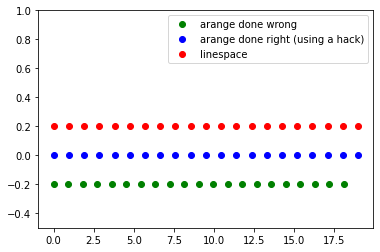

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

N = 21
y = np.zeros(N)
x0 = np.arange(0, 19, 19/N)
x1 = np.arange(0, 19.01, 19/(N-1))
x2 = np.linspace(0, 19, N, endpoint=True)

plt.plot(x0, y-0.2, 'o', c='green', label='arange done wrong')
plt.plot(x1, y, 'o', c='blue', label='arange done right (using a hack)')
plt.plot(x2, y+ 0.2, 'o', c='red', label='linespace')
plt.ylim([-0.5, 1])
plt.legend()
plt.show()

### Matrices with Random Elements

NumPy provides us also with functions that create an array of an given shape and populate it with random samples from a specified distribution.

For instance, we can construct a $5\times 5$ matrix with elements drawn from the uniform distribution on $[0,1)$ as follows.

In [15]:
np.random.seed(1)
R = np.random.uniform(low=0, high=1, size=(5,5))
print(R)
print('The shape of R is', R.shape)

[[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
  1.46755891e-01]
 [9.23385948e-02 1.86260211e-01 3.45560727e-01 3.96767474e-01
  5.38816734e-01]
 [4.19194514e-01 6.85219500e-01 2.04452250e-01 8.78117436e-01
  2.73875932e-02]
 [6.70467510e-01 4.17304802e-01 5.58689828e-01 1.40386939e-01
  1.98101489e-01]
 [8.00744569e-01 9.68261576e-01 3.13424178e-01 6.92322616e-01
  8.76389152e-01]]
The shape of R is (5, 5)


Alternatively, we can construct a $5\times 5$ matrix with elements drawn from the standard normal distribution as follows.

In [16]:
np.random.seed(1)
R = np.random.standard_normal(size=(5,5))
print(R)
print('The shape of R is', R.shape)

[[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
 [-2.3015387   1.74481176 -0.7612069   0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071 -0.3224172  -0.38405435  1.13376944]
 [-1.09989127 -0.17242821 -0.87785842  0.04221375  0.58281521]
 [-1.10061918  1.14472371  0.90159072  0.50249434  0.90085595]]
The shape of R is (5, 5)


Here is another example, where the elements of the $5\times 10$ matrix are integers that are uniformly drawn from the range 1 to 200.

In [17]:
np.random.seed(1)
D = np.random.randint(low=1,high=200,size=(5,10))
print(D)
print('The shape of R is', D.shape)

[[ 38 141  73 138 134  80 193 145 130  72]
 [135  26 179  21 102 147 140 157 158 143]
 [ 51  69  97  87 142 138   8  64  62  23]
 [ 58   2 129  61   9 142 116 176 122  31]
 [ 72 132 199 150  50  58   4 197  25  44]]
The shape of R is (5, 10)


Note that we use the function `np.random.seed()` to set a seed value for initializing the random number generator.
It is always a good idea to set a seed for debugging your code or reproducing results.


## Basic Array Operations

```{note}
Many of the operations described in the remainder of this section, such as matrix multiplication and inner products, haven't been introduced mathematically yet, and we do not expect you to be familiar with them. However, it is useful to see the numpy syntax for these things, and perhaps refer back to this notebook later in the course when we will work with these operations frequently.
```

Performing basic operation on `ndarray` objects is easy.
In many cases, these operations correspond to linear algebra operations.
In other cases, they can be used to do other useful things.


### Array addition

The sum of $\mathbf{A}$ and $\mathbf{A}$, denoted $\mathbf{A}$ + $\mathbf{A}$, is computed by adding corresponding elements of A and B:


$$
 \mathbf{A} + \mathbf{B} = \begin{bmatrix}
a_{11} & a_{12}  \\
a_{21} & a_{22} \\
\end{bmatrix}
+
\begin{bmatrix}
b_{11} & b_{12}  \\
b_{21} & b_{22} \\
\end{bmatrix}
=
\begin{bmatrix}
a_{11}+b_{11} & a_{11}+b_{12}  \\
a_{21}+b_{21} & a_{11}+b_{22} \\
\end{bmatrix}
$$


The sum of two matrices A and B will be a matrix which has the same number of rows and columns as A and B. Note, that the two arrays must have an equal number of rows and columns. Let A and B be:

In [18]:
A = np.array(([1,2], [3,4]))
B = np.ones((2,2))

Using NumPy objects, the sum of A and B can be computed as follows.

In [19]:
A + B

array([[2., 3.],
       [4., 5.]])

Note that matrix addition is commutative, i.e., $\mathbf{A} + \mathbf{B} = \mathbf{B} + \mathbf{A}$.

In [20]:
B + A

array([[2., 3.],
       [4., 5.]])

### Matrix multiplication

The matrix product of $\mathbf{A}$ and $\mathbf{B}$, denoted $\mathbf{A}\mathbf{B}$, can be computed by the dot product of the ith row of $\mathbf{A}$ and the jth column of $\mathbf{B}$.


$$
\mathbf{A} \mathbf{B} = \begin{bmatrix}
a_{11} & a_{12}  \\
a_{21} & a_{22} \\
\end{bmatrix}
\begin{bmatrix}
b_{11} & b_{12}  \\
b_{21} & b_{22} \\
\end{bmatrix}
=
\begin{bmatrix}
a_{11}b_{11}+a_{12}b_{21} & a_{11}b_{12}+a_{12}b_{22}  \\
a_{21}b_{11}+a_{22}b_{21} & a_{21}b_{12}+a_{22}b_{22} \\
\end{bmatrix}
$$


Thus the product AB is defined if and only if the number of columns in A equals the number of rows in B.


Given two NumPy `ndarray` objects, the matrix product can be computed by using the `np.dot` function.

In [21]:
np.dot(A, B)

array([[3., 3.],
       [7., 7.]])

We can also exploit the fact that A is an object and compute the matrix product as follows.

In [22]:
A.dot(B)

array([[3., 3.],
       [7., 7.]])

Note that the matrix product is not commutative, i.e., $\mathbf{A} \mathbf{B} \neq \mathbf{B} \mathbf{A}$.

In [23]:
B.dot(A)

array([[4., 6.],
       [4., 6.]])

Further, note that the matrix product of $\mathbf{A} \mathbf{I} = \mathbf{A}$.

In [24]:
I = np.eye(2)
A.dot(I)

array([[1., 2.],
       [3., 4.]])

### Computing statistics on arrays of numbers

NumPy allows us to do operations on arrays quickly.
For example, we can try computing some statistics on an array of random numbers.

In [25]:
dataset_rn = np.random.random((2, 3))
print(dataset_rn)
print()
print("Max:", np.max(dataset_rn))
print("Max of each row:", np.max(dataset_rn, axis=0))
print("Max of each col:", np.max(dataset_rn, axis=1))
print("Min:", np.min(dataset_rn))
print("Mean:", np.mean(dataset_rn))
print("Median:", np.median(dataset_rn))
print("Standard deviation:", np.std(dataset_rn))
print("Sum:", np.sum(dataset_rn))

[[0.68650093 0.83462567 0.01828828]
 [0.75014431 0.98886109 0.74816565]]

Max: 0.9888610889064947
Max of each row: [0.75014431 0.98886109 0.74816565]
Max of each col: [0.83462567 0.98886109]
Min: 0.018288277344191806
Mean: 0.671097655859075
Median: 0.7491549846624035
Standard deviation: 0.3072187623339347
Sum: 4.02658593515445


### Slicing and dicing

In many situations we need to extract elements or subsets from an array.
To do so, we can use slicing and dicing operations.

In [26]:
print(A)

[[1 2]
 [3 4]]


Get the first element in the first row of A.

In [27]:
A[0,0]

1

Get the second element in the first row of A.

In [28]:
A[0,1]

2

Get the second row.

In [29]:
A[1]

array([3, 4])

Get the first column of A.

In [30]:
A[:,0]

array([1, 3])

Recall the random matrix D.

In [31]:
print(D)

[[ 38 141  73 138 134  80 193 145 130  72]
 [135  26 179  21 102 147 140 157 158 143]
 [ 51  69  97  87 142 138   8  64  62  23]
 [ 58   2 129  61   9 142 116 176 122  31]
 [ 72 132 199 150  50  58   4 197  25  44]]


Get the first 3 rows and columns of D

In [32]:
D[0:3,0:3]

array([[ 38, 141,  73],
       [135,  26, 179],
       [ 51,  69,  97]])

### Array broadcasting


Again get the first 3 rows and columns of D and assign it to a new variable.

In [33]:
subset_of_D = D[0:3,0:3]
print(subset_of_D)

[[ 38 141  73]
 [135  26 179]
 [ 51  69  97]]


Change the first element of subset_of_D.

In [34]:
subset_of_D[0,0] = 99
print(subset_of_D)

[[ 99 141  73]
 [135  26 179]
 [ 51  69  97]]


Note that NumPy Arrays are always shallow copied. Hence any modification made in derivative affects the source, e.g., changing an element of subset_of_D also affects D.

In [35]:
print(D)

[[ 99 141  73 138 134  80 193 145 130  72]
 [135  26 179  21 102 147 140 157 158 143]
 [ 51  69  97  87 142 138   8  64  62  23]
 [ 58   2 129  61   9 142 116 176 122  31]
 [ 72 132 199 150  50  58   4 197  25  44]]


### Array searching


Search for all elements in subset_of_D that are greater than 100.

In [36]:
subset_of_D > 100

array([[False,  True, False],
       [ True, False,  True],
       [False, False, False]])

This condition condition returns a Boolean matrix of same dimension as the array that is being queried. We can also use this Truth vector as an index to search, e.g., get all numbers greater than 100.

In [37]:
subset_of_D[subset_of_D>100]

array([141, 135, 179])

We can also find elements within a range for instance:

In [38]:
subset_of_D[(subset_of_D>100) & (subset_of_D<150)]

array([141, 135])

### Reshaping NumPy arrays

In some situations it is required to reshape an array of numbers. You can do so using the `reshape` function.

In [39]:
subset_of_D = D[0:3,0:4]
print(subset_of_D)

[[ 99 141  73 138]
 [135  26 179  21]
 [ 51  69  97  87]]


Here are a few examples.

In [40]:
subset_of_D.reshape(4, 3)

array([[ 99, 141,  73],
       [138, 135,  26],
       [179,  21,  51],
       [ 69,  97,  87]])

In [41]:
subset_of_D.reshape(1, 12)

array([[ 99, 141,  73, 138, 135,  26, 179,  21,  51,  69,  97,  87]])

In [42]:
subset_of_D.reshape(12, 1)

array([[ 99],
       [141],
       [ 73],
       [138],
       [135],
       [ 26],
       [179],
       [ 21],
       [ 51],
       [ 69],
       [ 97],
       [ 87]])

In [43]:
subset_of_D.reshape(12)

array([ 99, 141,  73, 138, 135,  26, 179,  21,  51,  69,  97,  87])

Note that `subset_of_D.reshape(12)` is not the same as `subset_of_D.reshape(1,12)`.

In [44]:
subset_of_D.reshape(12).shape == subset_of_D.reshape(1,12).shape

False

The operation `subset_of_D.reshape(12)` is collapsing the array into one dimension, i.e., it turns the array into a row vector.  The operation `subset_of_D.reshape(1,12)` is turning the array into an explicit row vector, but I suggest to avoid doing this (see below).


## Vectors

Vectors are central to linear algebra, and they are also central to NumPy.
In NumPy, there are a few subtleties when working with arrays to do vector operations.
If you are careful about the subtleties, then you will avoid a lot of problems.

A row vector is an $1\times n$ matrix.
Here is an example:

In [45]:
x = np.array([1,2,3])
x

array([1, 2, 3])

The shape of a row vector looks as follows.

In [46]:
x.shape

(3,)

In NumPy, a row vector is a one dimensional array.
You can also push a row vector into an explicit row vector.

In [47]:
x.reshape(1,3)

array([[1, 2, 3]])

Do you see that this operation introduces another pair of brackets, i.e., [[]].
This, can lead to all kind of troubles and hence I suggest that you avoid using explicit row vectors.


A column vector is an $m\times 1$ matrix. Here is an example:

In [48]:
v = np.array(([6],[7],[8]))
print(v)
v.shape

[[6]
 [7]
 [8]]


(3, 1)

You can turn a column vector into a row vector by flattening the vector.

In [49]:
v.reshape(v.shape[0])

array([6, 7, 8])

### Inner product

Recall, given $v,w \in \mathbb{R}^n$, the inner product is defined as:


$$
\langle v,w\rangle = v_{1}w_{1}+v_{2}w_{2}+\dots+v_{n}w_{n}  .
$$


The inner product is also equal to the matrix product of the two vectors:

$$
v^T w = v_{1}w_{1}+v_{2}w_{2}+\dots+v_{n}w_{n}
$$



You can use a for loop to compute the inner product of v and w.

In [50]:
def dotproduct(x1,x2):
    xv = 0
    for i in range(x1.shape[0]):
        xv += x1[i]*x2[i]
    return xv

In [51]:
%time dotproduct(x,v)

CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 39.8 µs


array([44])

However, as you can see, using a loop is slow.
Instead, we can use numpy's build in function to compute the inner product.

In [52]:
%time x.reshape(1,3).dot(v)

CPU times: user 12 µs, sys: 4 µs, total: 16 µs
Wall time: 16.9 µs


array([[44]])

## 5. Applying operations to vectors

We can use built-in NumPy functions like `np.sin` and `np.exp` on one-modal arrays to perform operations on each element of the array.

For example:

In [53]:
vector = np.array([1,0,-1])
vector

array([ 1,  0, -1])

In [54]:
new_vector = np.exp(vector)
new_vector

array([2.71828183, 1.        , 0.36787944])

The entries in the `new_vector` above are $e$ ($e^1$), $1$ ($e^0$), and $\frac{1}{e}$ ($e^{-1}$).

Similarly, applying `np.sin` (or `np.cos`) to a vector returns a new vector, whose elements are the value of the function `np.sin` evaluated on each of the elements of the original vector (the function is "applied element wise", to use jargon).

In [55]:
from math import pi
vector = np.array([-pi/2, 0, pi/2])
vector

array([-1.57079633,  0.        ,  1.57079633])

In [56]:
new_vector = np.sin(vector)
new_vector

array([-1.,  0.,  1.])

The same thing happens with two-modal arrays. For example, with `np.exp`:

In [57]:
matrix = np.array([[1, 0, -1], [-1, 0, 1]])
matrix

array([[ 1,  0, -1],
       [-1,  0,  1]])

In [58]:
new_matrix = np.exp(matrix)
new_matrix

array([[2.71828183, 1.        , 0.36787944],
       [0.36787944, 1.        , 2.71828183]])

Similarly, with `np.cos` (or any other built-in NumPy function):

In [59]:
matrix = np.array([[-pi/2, 0, pi/2], [0, pi, 2*pi]])
matrix

array([[-1.57079633,  0.        ,  1.57079633],
       [ 0.        ,  3.14159265,  6.28318531]])

In [60]:
new_matrix = np.cos(matrix)
new_matrix

array([[ 6.123234e-17,  1.000000e+00,  6.123234e-17],
       [ 1.000000e+00, -1.000000e+00,  1.000000e+00]])

In [61]:
rounded_new_matrix = np.round(new_matrix)
rounded_new_matrix

array([[ 0.,  1.,  0.],
       [ 1., -1.,  1.]])

## Making Stacks (Merge 2D `ndarrays` horizontally or vertically)

Sometimes, we use a matrix as a collection of vectors. For example, each row or column is a feature vector corresponding to a different measurement. Other times, we simply want to concatenate two matrices for computational convenience. In both cases, we can use `np.hstack` and `np.vstack` to merge two dimensional `ndarray`'s horizontally and vertically, respectively.


### Basics of `np.hstack` and `np.vstack`


Use `np.hstack` to concatenate two matrices (two dimensional NumPy arrays) horizontally.

Make sure you pass in a tuple containing `(A, B)`, rather than passing in `A` and `B` as two arguments.

In [62]:
A = np.array([[1, 2], [5, 6]])

B = np.array([[3, 4], [7, 8]])

C = np.hstack((A, B))

print("A:\n{}\n\nB:\n{}\n\nC:\n{}".format(A, B, C))

A:
[[1 2]
 [5 6]]

B:
[[3 4]
 [7 8]]

C:
[[1 2 3 4]
 [5 6 7 8]]


Similarly, use `np.vstack` to concatenate two matrices (two dimensional NumPy arrays) vertically

In [63]:
D = np.vstack((A, B))

print("D:\n{}".format(D))

D:
[[1 2]
 [5 6]
 [3 4]
 [7 8]]